In [1]:
%matplotlib inline

import random

# Data analysis and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ML + metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# For reproductibility
SEED = 123
random.seed(SEED)

In [4]:
sig_ratio = [0.005, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

# We store the metrics results in a dictionary
results = {
    'lr':{
        'accuracy': [],
        'aucroc': [],
        'aucpr': []
    },
    'rf':{
        'accuracy': [],
        'aucroc': [],
        'aucpr': []
    },
    'bdt':{
        'accuracy': [],
        'aucroc': [],
        'aucpr': []
    }
}


# For every signal/background ratio we perform a 10-Fold CV
for r in sig_ratio:
    # Data-set creation
    X, y = datasets.make_classification(
        n_samples=10000,
        n_features=14,
        n_informative=2,
        weights=[(1-r), r],
        n_redundant=2,
        random_state=SEED
    )
    
    # Data pre-processing
    kf = StratifiedKFold(n_splits=10)
    kf.get_n_splits(X)
    print("signal ratio: ", r)
    
    lr_acc = []
    lr_aucroc = []
    lr_aucpr = []

    rf_acc = []
    rf_aucroc = []
    rf_aucpr = []

    bdt_acc = []
    bdt_aucroc = []
    bdt_aucpr = []
    
    X = StandardScaler().fit_transform(X)
    
    _k = 0
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]


        # LOGISTIC REGRESSION
        logreg = LogisticRegression(C=1, solver='lbfgs', n_jobs=-1)  # set n_jobs=1 to use only 1 CPU and -1 for all
        logreg.fit(X_train, y_train)

        lr_predProba = logreg.predict_proba(X_test)[:, 1]
        lr_pred = logreg.predict(X_test)

        lr_acc.append(accuracy_score(y_test, lr_pred))                                          # Accuracy
        lr_aucroc.append(roc_auc_score(y_test, lr_predProba))                                   # AUC-ROC
        lr_precisionCurve, lr_recallCurve, _ = precision_recall_curve(y_test, lr_predProba, pos_label=1)
        lr_aucpr.append(auc(lr_recallCurve, lr_precisionCurve))               # AUC-PR

        # RANDOM FOREST
        randforest = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1)
        randforest.fit(X_train, y_train)

        rf_predProba = randforest.predict_proba(X_test)[:, 1]
        rf_pred = randforest.predict(X_test)

        rf_acc.append(accuracy_score(y_test, rf_pred))                                          # Accuracy
        rf_aucroc.append(roc_auc_score(y_test, rf_predProba))                                   # AUC-ROC
        rf_precisionCurve, rf_recallCurve, _ = precision_recall_curve(y_test, rf_predProba, pos_label=1)
        rf_aucpr.append(auc(rf_recallCurve, rf_precisionCurve))                 # AUC-PR

        # BDT
        bdt = AdaBoostClassifier(n_estimators=100)
        bdt.fit(X_train, y_train)

        bdt_predProba = bdt.predict_proba(X_test)[:, 1]
        bdt_pred = bdt.predict(X_test)

        bdt_acc.append(accuracy_score(y_test, bdt_pred))                                          # Accuracy
        bdt_aucroc.append(roc_auc_score(y_test, bdt_predProba))                                   # AUC-ROC
        bdt_precisionCurve, bdt_recallCurve, _ = precision_recall_curve(y_test, bdt_predProba, pos_label=1)
        bdt_aucpr.append(auc(bdt_recallCurve, bdt_precisionCurve))                 # AUC-PR
        
        _k += 1
        print('K-Fold: ', str(_k) + '/' + '10')
        
    # Keep the mean of CV 10-Fold
    results['lr']['accuracy'].append(np.mean(lr_acc))
    results['lr']['aucroc'].append(np.mean(lr_aucroc))
    results['lr']['aucpr'].append(np.mean(lr_aucpr))
    
    results['rf']['accuracy'].append(np.mean(rf_acc))
    results['rf']['aucroc'].append(np.mean(rf_aucroc))
    results['rf']['aucpr'].append(np.mean(rf_aucpr))
    
    results['bdt']['accuracy'].append(np.mean(bdt_acc))
    results['bdt']['aucroc'].append(np.mean(bdt_aucroc))
    results['bdt']['aucpr'].append(np.mean(bdt_aucpr))

print('Done')

signal ratio:  0.005
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.05
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.1
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.15
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.2
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.25
K-Fold:  1/10
K-Fold:  2/10
K-Fold:  3/10
K-Fold:  4/10
K-Fold:  5/10
K-Fold:  6/10
K-Fold:  7/10
K-Fold:  8/10
K-Fold:  9/10
K-Fold:  10/10
signal ratio:  0.3
K-Fold:  1/10
K-

In [5]:
# Print description of the results
lr_results  =pd.DataFrame(results['lr'])
print('-'*5 + 'LOGISTIC REGRESSION' + '-'*5)
print(lr_results.describe())

rf_results  =pd.DataFrame(results['rf'])
print('-'*5 + 'RANDOM FOREST' + '-'*5)
print(rf_results.describe())

bdt_results  =pd.DataFrame(results['bdt'])
print('-'*5 + 'BOOSTING DECISION TREE' + '-'*5)
print(bdt_results.describe())

-----LOGISTIC REGRESSION-----
        accuracy     aucroc      aucpr
count  11.000000  11.000000  11.000000
mean    0.956045   0.954523   0.892017
std     0.017906   0.063489   0.169710
min     0.936000   0.764514   0.394572
25%     0.942500   0.970586   0.913500
50%     0.951400   0.976698   0.953655
75%     0.965450   0.977463   0.968947
max     0.992400   0.978489   0.977146
-----RANDOM FOREST-----
        accuracy     aucroc      aucpr
count  11.000000  11.000000  11.000000
mean    0.956491   0.951041   0.895722
std     0.016826   0.068462   0.156251
min     0.930200   0.747724   0.452237
25%     0.949950   0.963918   0.904771
50%     0.960300   0.971516   0.956090
75%     0.961950   0.980183   0.975821
max     0.991500   0.982534   0.982510
-----BOOSTING DECISION TREE-----
        accuracy     aucroc      aucpr
count  11.000000  11.000000  11.000000
mean    0.974564   0.958118   0.913033
std     0.011279   0.071657   0.153654
min     0.959700   0.744613   0.460930
25%     0.965950

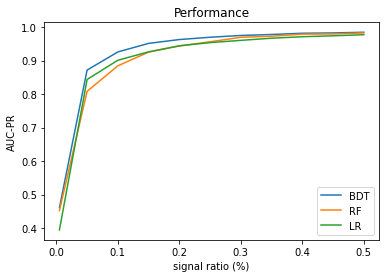

In [13]:
METRIC = 'aucpr'
fig = plt.figure()
plt.plot(sig_ratio, bdt_results[METRIC], label='BDT')
plt.plot(sig_ratio, rf_results[METRIC], label='RF')
plt.plot(sig_ratio, lr_results[METRIC], label='LR')
plt.legend(loc='best')
plt.title('Performance')
plt.ylabel('AUC-PR')
plt.xlabel('signal ratio (%)')
fig.savefig('perf.png')

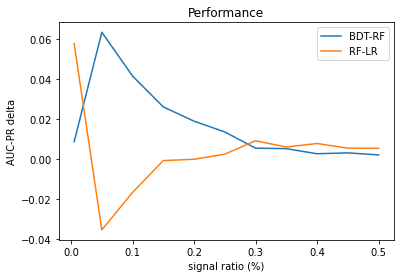

In [12]:
# Looking at the delta between classifiers
fig = plt.figure()
plt.plot(sig_ratio, bdt_results[METRIC] - rf_results[METRIC], label='BDT-RF')
plt.plot(sig_ratio, rf_results[METRIC] - lr_results[METRIC], label='RF-LR')
plt.legend(loc='best')
plt.title('Performance')
plt.ylabel('AUC-PR delta')
plt.xlabel('signal ratio (%)')
fig.savefig('perfdelta.png')